## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 8. 5
- 성명 : 이상협
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print("cancer.keys():\n", cancer.keys())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
# 모델 학습 및 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
# 정확도
print(accuracy_score(y_test, pred))


0.9473684210526315


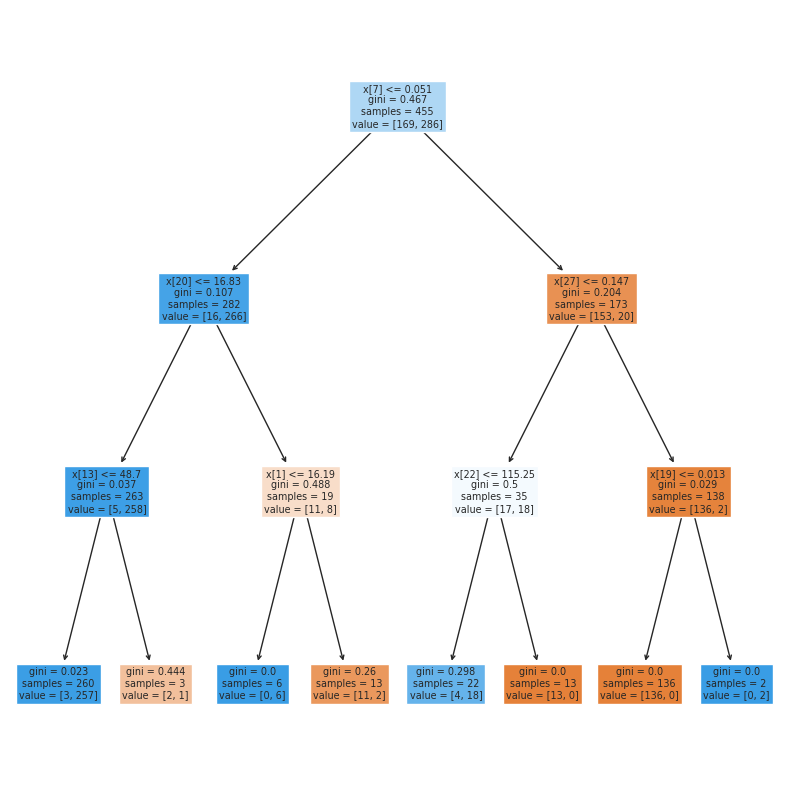

In [3]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True)
plt.show()

Q2. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [19]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 와인 데이터 불러오기
wine = datasets.load_wine()
param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_split': [2, 3, 4]
              }
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("최적 파라미터:", grid_search.best_params_)

# 최적 파라미터 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", accuracy)

최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
테스트 데이터 정확도: 0.9444444444444444


Q3. 보스톤 주택가격 데이터셋에 대하여 규제 선형 모델인 릿지, 라쏘, 엘라스틱넷 모델로 교차검증을 수행하고 아래 각 모델의 알파값의 변화에 따른 회귀계수의 변화를 출력하세요. (단, 사용자 함수를 작성하여 수행)
- ridge_alphas = [0, 0.1, 1, 10, 100]
- lasso_alphas = [0.07,0.1,0.5,1,3]
- elastic_alphas = [0.07,0.1,0.5,1,3], L1:L2 = 0.7:0.3

In [58]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [59]:
# 필요한 feature이면 dtype 변환 -  category 타입을 먼저 수치형으로 변환

boston_df['CHAS'] = boston_df['CHAS'].astype('float')
boston_df['RAD'] = boston_df['RAD'].astype('float')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [60]:
# get_linear_reg_eval 사용자 함수
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_list = [ridge, lasso, elastic]


def get_linear_reg_eval(model_name, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()

    model = model_name
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
    model.fit(X_data_n , y_target_n)
    return model

for model in model_list:
    pipe = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', model)])
    get_linear_reg_eval(pipe, X_train, y_train)

 5 교차 검증의 평균 RMSE : 4.053 
 5 교차 검증의 평균 RMSE : 4.691 
 5 교차 검증의 평균 RMSE : 4.678 


In [38]:
# Ridge
from sklearn.preprocessing import PolynomialFeatures
def model_ridge(X_train, X_test, y_train, y_test):
    ridge_alphas = [0, 0.1, 1, 10, 100]


    for alpha in ridge_alphas:
        pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('fit', Ridge(random_state = 42,alpha=alpha))])
        score = cross_val_score(pipe_ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
        print(f"alpha값이 {alpha}일때 평균 rmse는 {np.mean(np.sqrt(-score))}")

model_ridge(X_train, X_test, y_train, y_test)

alpha값이 0일때 평균 rmse는 4.123001458694297
alpha값이 0.1일때 평균 rmse는 4.261276359070825
alpha값이 1일때 평균 rmse는 4.053040326852043
alpha값이 10일때 평균 rmse는 3.575666888827642
alpha값이 100일때 평균 rmse는 3.8182143569134084


In [39]:
# Lasso
def model_lasso(X_train, X_test, y_train, y_test):
    lasso_alphas = [0.07,0.1,0.5,1,3]

    for alpha in lasso_alphas:
        pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('fit', Lasso(random_state = 42,alpha=alpha))])
        score = cross_val_score(pipe_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
        print(f"alpha값이 {alpha}일때 평균 rmse는 {np.mean(np.sqrt(-score))}")

model_lasso(X_train, X_test, y_train, y_test)

alpha값이 0.07일때 평균 rmse는 3.625436161306669
alpha값이 0.1일때 평균 rmse는 3.670005540785456
alpha값이 0.5일때 평균 rmse는 4.304687492594007
alpha값이 1일때 평균 rmse는 4.691162797203108
alpha값이 3일때 평균 rmse는 5.899202415501088


In [41]:
# Elasticnet

def model_elasticnet(X_train, X_test, y_train, y_test):
    elastic_alphas = [0.07,0.1,0.5,1,3]


    for alpha in elastic_alphas:

        pipe_elastic = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('fit', ElasticNet(random_state = 42,alpha=alpha,l1_ratio=0.7))])
        score = cross_val_score(pipe_elastic, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
        print(f"alpha값이 {alpha}일때,  평균 rmse는 {np.mean(np.sqrt(-score))}")

model_elasticnet(X_train, X_test, y_train, y_test)

alpha값이 0.07일때,  평균 rmse는 3.58324234040672
alpha값이 0.1일때,  평균 rmse는 3.619295193222803
alpha값이 0.5일때,  평균 rmse는 4.287134099656921
alpha값이 1일때,  평균 rmse는 4.6759665076960335
alpha값이 3일때,  평균 rmse는 6.063203116098152


Q4. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화 하세요.

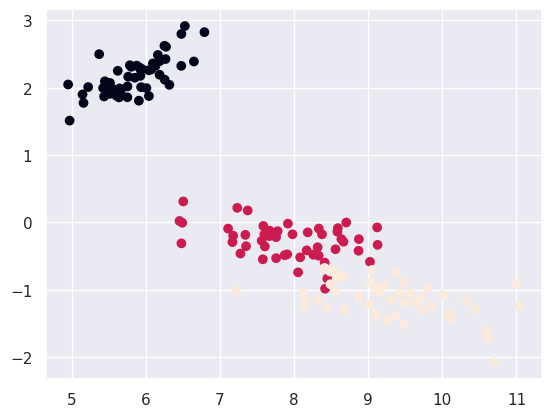

In [52]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data
iris_target = iris.target

svd = TruncatedSVD(n_components=2)
iris_svd = svd.fit_transform(iris_ftrs)

plt.scatter(iris_svd[:,0], iris_svd[:,1], c=iris_target)
plt.show()



Q5. iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명

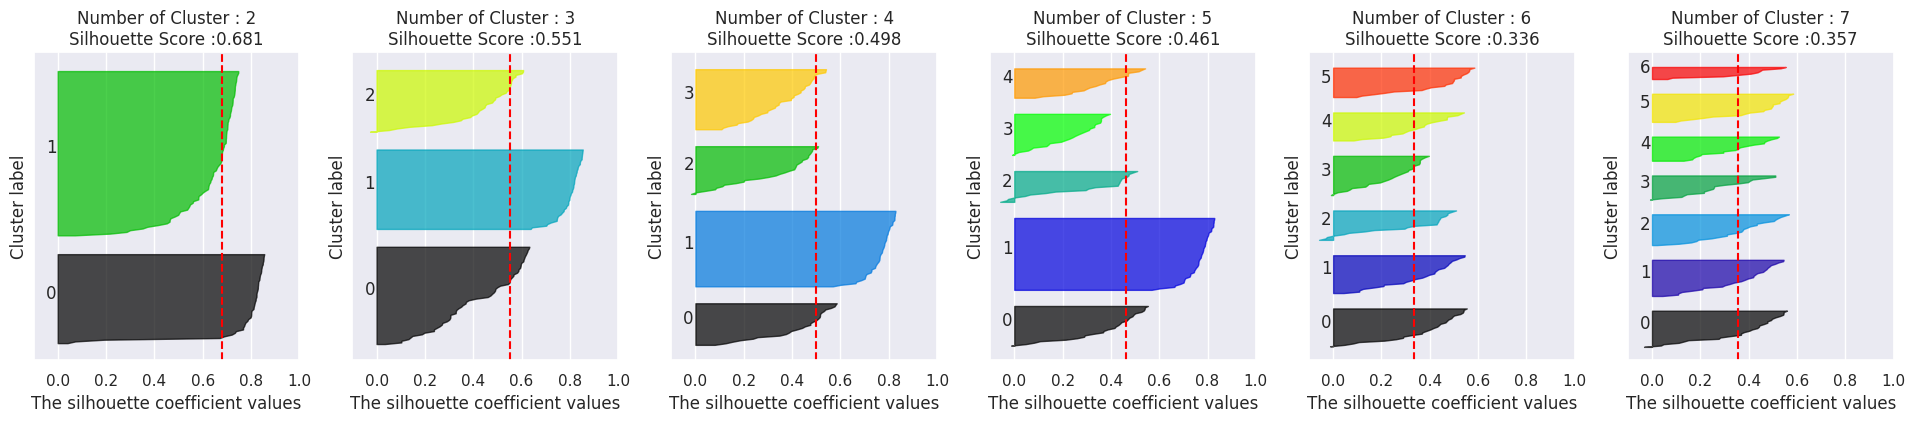

In [61]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)


    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

cluster_lists = [2,3,4,5,6,7]
visualize_silhouette(cluster_lists, iris_ftrs)
# 3개나 4개가 적당해보인다
# 넓이와 길이가 얼추 비슷하기때문 score도 준수

In [62]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


실습과제1. 실습과제 코드를 작성하세요.

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


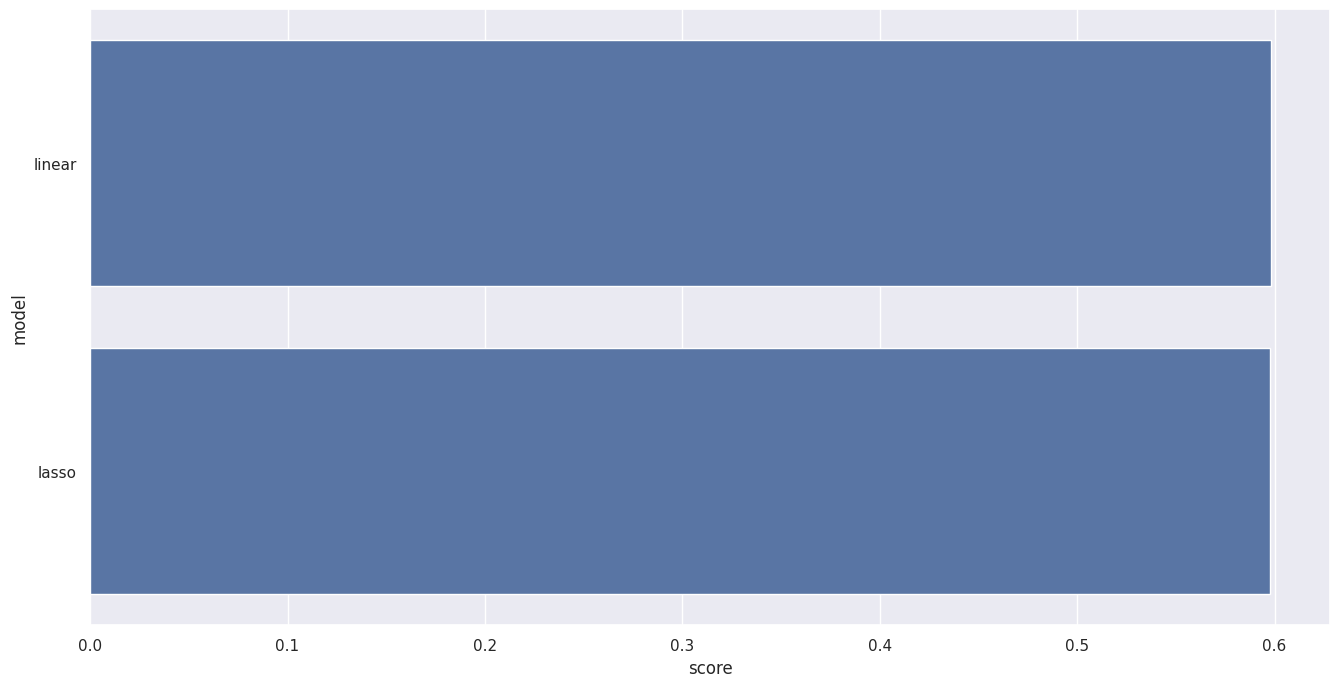

In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


def every_pipe():
    # pipe 생성
    pipe_linear = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', LinearRegression())])
    pipe_lasso = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Lasso(random_state = 42))])
    pipe_ridge = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pca = Pipeline([
                    ('scl', StandardScaler()),
                    ('pca', PCA()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pls = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', PLS())])
    pipe_gbr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', GBR())])
    pipe_rfr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', RFR())])
    pipe_svr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', SVR())])
    pipe_KR = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', KernelRidge())])
    pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls, pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
    return pipe

def every_param():
    grid_params_linear = [{
        "poly__degree" : np.arange(1,3),
        "fit__fit_intercept" : [True, False],
    }]
    grid_params_lasso = [{
        "poly__degree" : np.arange(1,3),
        "fit__tol" : np.logspace(-5,0,10) ,
        "fit__alpha" : np.logspace(-5,1,10) ,
                        }]
    grid_params_pca = [{
        "pca__n_components" : np.arange(2,8)
    }]
    grid_params_ridge = [{
        "poly__degree" : np.arange(1,3),
        "fit__alpha" : np.linspace(2,5,10) ,
        "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
        "fit__tol" : np.logspace(-5,0,10) ,
                        }]
    grid_params_pls = [{
        "fit__n_components" : np.arange(2,8)
    }]
    min_samples_split_range = [0.1, 0.5, 0.7 , 0.9]

    grid_params_gbr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__loss" : ["ls","lad","huber","quantile"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_rfr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_svr =[{
        "fit__kernel" : ["rbf", "linear"] ,
        "fit__degree" : [2, 3, 5] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    grid_params_KR =[{
        "fit__kernel" : ["rbf","linear"] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    params = [grid_params_linear, grid_params_lasso, grid_params_pca, grid_params_ridge, grid_params_pls, grid_params_gbr, grid_params_rfr, grid_params_svr, grid_params_KR]
    return params




pipe = every_pipe()
params = every_param()
grid_dict = {
    0: 'linear',
    1: 'lasso',
    2: 'PCA' ,
    3: 'ridge' ,
    4: 'PSL',
    5: "GDR" ,
    6: "RF" ,
    7: "SVR" ,
    8: "KRR"
            }

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.4, random_state=0)

def main(pipe, params, grid_dict, X_train, X_test, y_train, y_test):
    model_mse = {}
    model_r2 = {}
    model_best_params = {}

    for idx , (param , model) in enumerate(zip(params , pipe)) :
        search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , verbose=0 )
        search.fit(X_train , y_train)
        y_pred = search.predict(X_test)
        model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
        model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
        model_best_params[grid_dict.get(idx)] = search.best_params_
        # idx값 수정@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        if idx == 1:
            break

    fig ,ax = plt.subplots(figsize=(16, 8))
    sns.set(font_scale = 2)
    output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["model","score"]).T
    output.sort_values(["score"], ascending= False ,inplace=True)
    ax = sns.barplot(y="model", x="score", data=output)
    plt.show()
    return




main(pipe, params, grid_dict, X_train, X_test, y_train, y_test)